# 0. Import des modules

Nous allons importer des modules.

In [1]:
# pour manipuler les données
import pandas as pd

# pour l'affichage de graohiques statiques
%matplotlib inline
import matplotlib.pyplot as plt

# pour des graphiques de stats
import seaborn as sns
sns.set()

# 1. Chargement de données

In [2]:
df = sns.load_dataset('titanic')

df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
479,1,3,female,2.0,0,1,12.2875,S,Third,child,False,NaN,Southampton,yes,False
764,0,3,male,16.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
816,0,3,female,23.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,no,True
615,1,2,female,24.0,1,2,65.0000,S,Second,woman,False,NaN,Southampton,yes,False


# 2. Exploration visuelle des données (EDA)

## 2.1. Cellules vides

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
help(df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |    

[Text(0, 0.5, 'colonnes de la table'),
 (0, 1),
 Text(0.5, 0, 'pourcentage'),
 Text(0.5, 1.0, 'Pourcentage de cellules vides')]

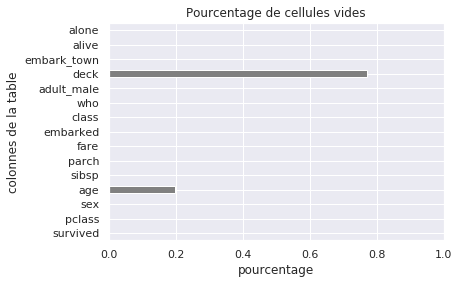

In [5]:
ax = df.isnull().mean().plot.barh(color='grey', figsize=(6, 4))

ax.set(
    title="Pourcentage de cellules vides",
    xlabel="pourcentage",
    ylabel="colonnes de la table",
    xlim=(0, 1)
)

In [6]:
c = df['deck'].isnull()

df.loc[c]['class'].value_counts(normalize=True)

Third     0.696221
Second    0.244186
First     0.059593
Name: class, dtype: float64

In [7]:
df['class'].value_counts(normalize=True)

Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64

In [8]:
df['deck_isnull'] = df['deck'].isnull()
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_isnull
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True


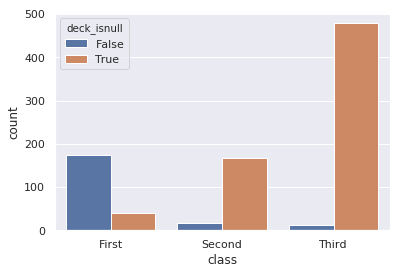

In [9]:
sns.countplot(data=df, x="class", hue="deck_isnull")

### Age

In [10]:
df['age_isnull'] = df['age'].isnull()

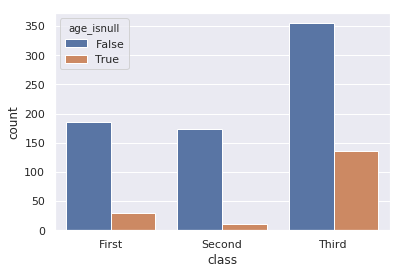

In [11]:
sns.countplot(data=df, x="class", hue="age_isnull")

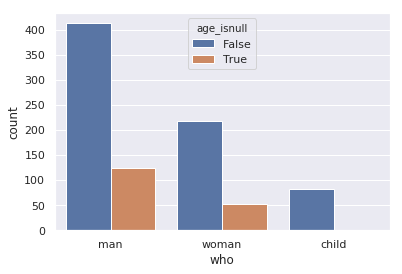

In [12]:
sns.countplot(data=df, x="who", hue="age_isnull")

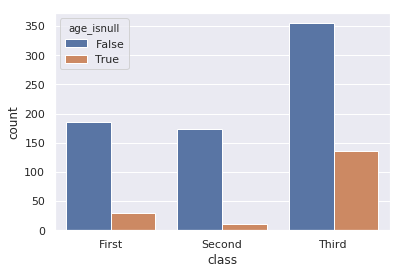

In [13]:
sns.countplot(data=df, x="class", hue="age_isnull")

### Remplissons les âges vides

In [16]:
c = (df['who'] == 'man')

df.loc[c]['age'].median()

30.0

In [27]:
import numpy as np

In [30]:
def fill_age(row):
    if np.isnan(row['age']):
        # on récupère toutes les lignes du même sexe
        c = (df['who'] == row['who'])
        
        # on renvoie l'âge moyen des passagers du même sexe
        return df.loc[c]['age'].median()
    else:
        return row['age']

df['age_filled'] = df.apply(fill_age, axis='columns')

df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_isnull,age_isnull,age_filled
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False,True,False,11.0
293,0,3,female,24.0,0,0,8.8500,S,Third,woman,False,NaN,Southampton,no,True,True,False,24.0
731,0,3,male,11.0,0,0,18.7875,C,Third,child,False,NaN,Cherbourg,no,True,True,False,11.0
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True,True,True,30.0
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False,True,False,4.0


## 2.2. Valeurs aberrantes

In [31]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,age_filled
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.758889
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002570
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,30.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


### Age

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


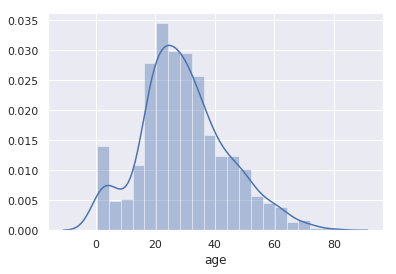

In [32]:
sns.distplot(df['age'].dropna())

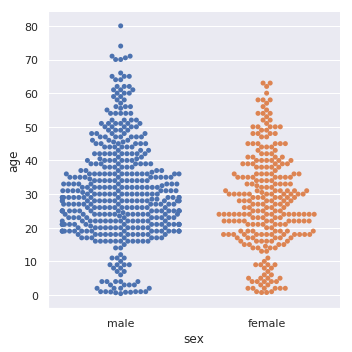

In [37]:
sns.catplot(data=df, y='age', x='sex', kind='swarm')

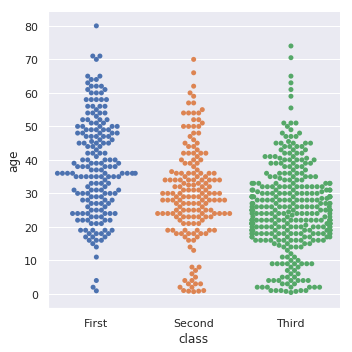

In [38]:
sns.catplot(data=df, y='age', x='class', kind='swarm')

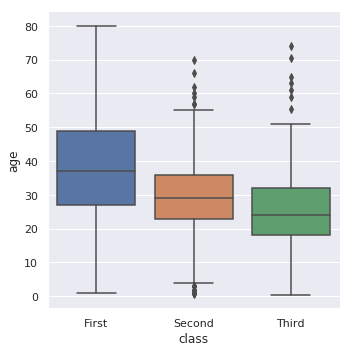

In [39]:
sns.catplot(data=df, y='age', x='class', kind='box')

### Fare (prix du billet)

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


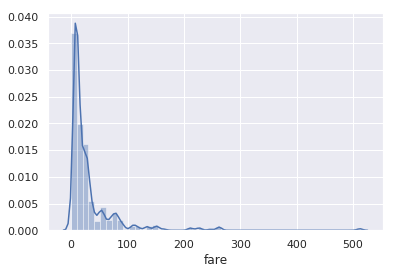

In [43]:
sns.distplot(df['fare'])

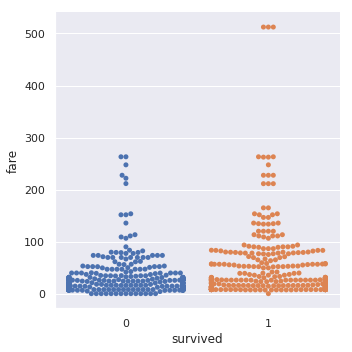

In [44]:
sns.catplot(data=df, x="survived", y="fare", kind="swarm")

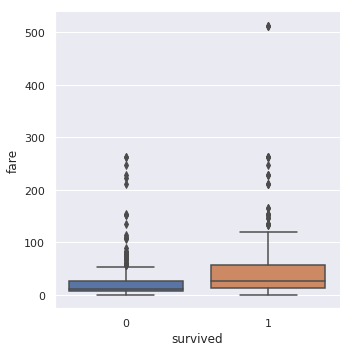

In [45]:
sns.catplot(data=df, x="survived", y="fare", kind="box")

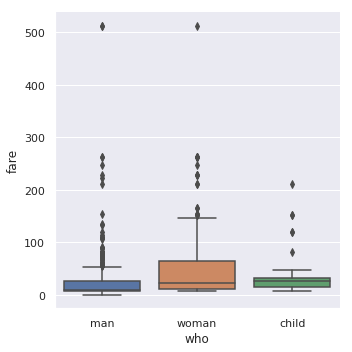

In [47]:
sns.catplot(data=df, x="who", y="fare", kind="box")

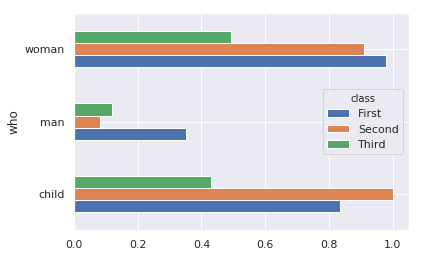

In [53]:
df.pivot_table(values='survived', aggfunc='mean',
               index='who', columns='class') \
 .plot.barh()